In [18]:
import pickle
from sklearn.externals import joblib

from tensorflow.keras import models
import pandas as pd

import matplotlib.pyplot as plt

In [13]:
sav_path = '../../cooked_data/saone/best_model/'

model_path = sav_path + 'model'
model = models.load_model( model_path, custom_objects=None, compile=True, options=None )

scaler_path = sav_path + 'scaler.save'
scaler = joblib.load(scaler_path)

traindf_path = sav_path + 'traindf.pickle'
df = pd.read_pickle(traindf_path)

valdf_path = sav_path + 'valdf.pickle'
valdf = pd.read_pickle(valdf_path)


In [16]:
# DATA PREPARATION

feature_cols = [ 'sin_doy', 'cos_doy', 'mean_station', 'precipitation', 'temp' ]

# DataPrep
X_val = valdf[feature_cols]
X_val = scaler.transform(X_val)
y = valdf['nitrate']

# PREDICTION
y_pred = model.predict(X_val)

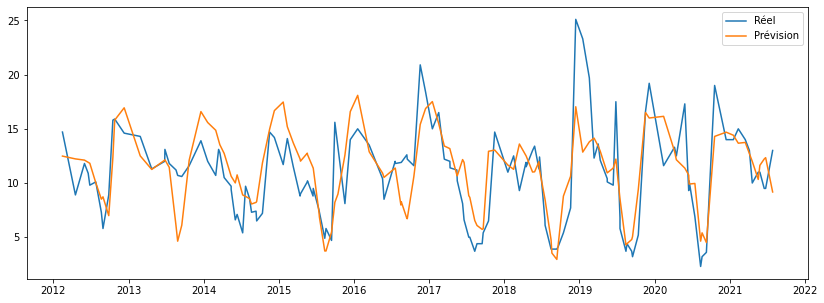

In [19]:
# PLOT

valdf['prediction'] = y_pred

valdf.sort_values('date',inplace=True)

plt.figure(figsize=(14,5))
plt.plot(valdf['date'],valdf['nitrate'],label='Réel')
plt.plot(valdf['date'],valdf['prediction'],label='Prévision')
plt.legend()
plt.show()